<div style="font-family: Arial,sans-serif; color: #3070b3; font-size: 13px; line-height: 14px;; margin-top:25px ">
    <div style="float:right;">
        <a href="https://www.asg.ed.tum.de/en/lmf" title="Home">
            <img src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Logo_of_the_Technical_University_of_Munich.svg" alt="Technical University of Munich" style="height: 42px">
        </a>
    </div>
    <div>
        <ul style="padding: 0pt; margin: 0pt; list-style-type: none;">
            <li> <a href="https://www.asg.ed.tum.de/en/lmf/" title="Home Chair of Remote Sensing Technology" style="text-decoration: none;">Chair of Remote Sensing Technology</a></li>
            <li> <a href="https://www.ed.tum.de/en/" title="Home TUM School of Engineering and Design" style="text-decoration: none;">TUM School of Engineering and Design</a></li>
            <li> <a href="https://www.tum.de/en/" title="Home Technical University of Munich" style="text-decoration: none;"> Technical University of Munich </a></li>
        </ul>
    </div>
</div>

<div style="font-family: Arial,sans-serif; font-size: 14px; line-height: 16px; margin-top:50px">
    <div style="float:right;">
        <span style="font-size:small">Prof. Dr. rer. nat. habil.</span><br />
        <b>Marco Körner</b><br />
    </div>
    <div style="">
        <h1>Remote Sensing Data <span style="font-size:small"> or &nbsp; </span> Estimation Theory</h1>
        <p style="font-size:large">Summer Term 2024</p>
    </div>
</div>

---

## The Curse of Dimensionality

In [1]:
import numpy as np

from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize

import pandas as pd

import matplotlib.pyplot as plt


        
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [39]:
N = int(1e3)
print(f'samples: {N}')

dimensions = [2**d for d in range(0,10)]
print(f'dimensions: {dimensions}')

metrics = [
    'euclidean', 
    # 'manhattan',
    # 'chebyshev',
    'cosine'
]

colors = {
    metrics[0]: 'blue', 
    metrics[1]: 'red',
}

print(f'metrics: {metrics}')

samples: 1000
dimensions: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
metrics: ['euclidean', 'cosine']


In [41]:
# prepare our data frame
dists = pd.DataFrame()

for D in dimensions:
    
    dists_ = {'D': D}
    
    # uniformely distributed vectors
    X = [np.random.uniform(0,1,D) for i in range(int(N))]
    
    # normally distributed vectors
    X = [np.random.normal(0.5,.5,D) for i in range(int(N))]
    
    # normalize vectors to unit-length: all points populate on the unit sphere's surface
    X = normalize(X)
        
    for metric in metrics:
    
        if metric == 'cosine':
            X_ = normalize(X)
            dist = np.array(X_)@np.array(X_).transpose()# / np.pi*180
        else:
            dist = pairwise_distances(X, metric=metric)
        
        # we only use the upper triangle of the distance matrix
        tri = np.triu_indices_from(dist, k=0)
        
        # compute the statistics
        dist[tri] = np.nan
        dists_[f'd_min_{metric}'] = np.nanmin(dist)
        dists_[f'd_max_{metric}'] = np.nanmax(dist)
        dists_[f'd_avg_{metric}'] = np.nanmean(dist)
        dists_[f'd_std_{metric}'] = np.nanstd(dist)
        dists_[f'd_NN_max_{metric}'] = np.nanmax(np.nanmin(dist, axis=0))
        dists_[f'd_NN_avg_{metric}'] = np.nanmean(np.nanmin(dist, axis=0))
                    
    dists = pd.concat([dists, pd.DataFrame(dists_, index=[D])], ignore_index=True)

from IPython.display import display
display(dists)

D  d_min_euclidean  d_max_euclidean  d_avg_euclidean  d_std_euclidean  \
0    1         0.000000         2.000000         0.546270         0.891139   
1    2         0.000003         2.000000         0.847508         0.574799   
2    4         0.004007         1.999819         0.912975         0.359032   
3    8         0.118698         1.901782         0.970230         0.247332   
4   16         0.310087         1.724311         0.981487         0.168079   
5   32         0.506792         1.518467         0.989148         0.117568   
6   64         0.622166         1.390170         0.998860         0.083902   
7  128         0.743929         1.255373         0.995234         0.057869   
8  256         0.802485         1.191796         0.998742         0.041243   
9  512         0.856935         1.142252         1.000394         0.029735   

   d_NN_max_euclidean  d_NN_avg_euclidean  d_min_cosine  d_max_cosine  \
0            2.000000            0.002002     -1.000000      1.000000   
1            1.500630            0.017999     -1.000000      1.000000   
2            1.482342            0.151068     -0.999637      0.999992   
3            1.068272            0.376264     -0.808387      0.992955   
4            0.948907            0.557889     -0.486624      0.951923   
5            1.013603            0.689650     -0.152871      0.871581   
6            1.002288            0.785640      0.033714      0.806454   
7            1.071425            0.845216      0.212019      0.723285   
8            1.034102            0.891875      0.289812      0.678009   
9            0.992946            0.923878      0.347630      0.632831   

   d_avg_cosine  d_std_cosine  d_NN_max_cosine  d_NN_avg_cosine  
0      0.453730      0.891139        -1.000000        -1.000000  
1      0.475668      0.577820         0.453351        -0.982918  
2      0.518786      0.350917         0.268225        -0.640968  
3      0.498740      0.246498         0.659303        -0.294657  
4      0.504216      0.166802         0.651373         0.006509  
5      0.503882      0.117060         0.606696         0.157982  
6      0.497620      0.084104         0.601733         0.260330  
7      0.503080      0.057669         0.484158         0.343895  
8      0.500407      0.041222         0.537070         0.387360  
9      0.499164      0.029750         0.521817         0.420807

In [46]:
# dists[dists.columns[0:7]].to_markdown('table.md', floatfmt=".2f")
# !pandoc -i table.md -V geometry:"landscape, margin=1pt" -o table.pdf

# from wand.image import Image as WImage
# img = WImage(filename='table.pdf', resolution=200) # bigger
# display(img)

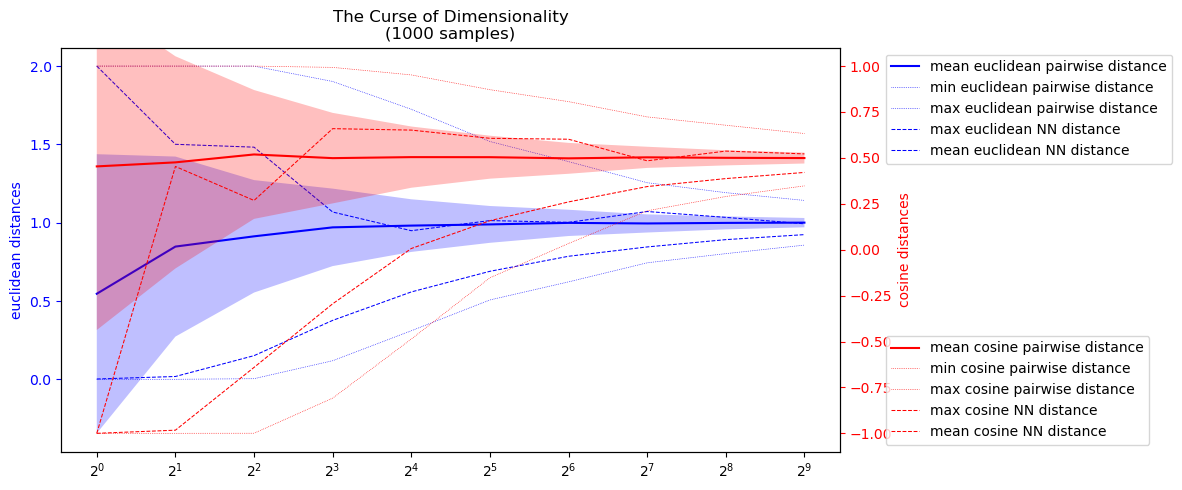

In [47]:
plt.clf()
plt.rcParams['figure.figsize'] = [12, 5]

# make it a double-y-axis plot
for ax, metric in zip([plt.gca(), plt.gca().twinx()], metrics[0:2]):
    
    # plotting mean, min, max
    ax.plot(dists['D'], dists[f'd_avg_{metric}'], 
            color=colors[metric], label=f'mean {metric} pairwise distance')
    ax.plot(dists['D'], dists[f'd_min_{metric}'], 
            ':', color=colors[metric], linewidth=.5, label=f'min {metric} pairwise distance')
    ax.plot(dists['D'], dists[f'd_max_{metric}'], 
            ':', color=colors[metric], linewidth=.5, label=f'max {metric} pairwise distance')
    ax.plot(dists['D'], dists[f'd_NN_max_{metric}'], 
            '--', color=colors[metric], linewidth=.75, label=f'max {metric} NN distance')
    ax.plot(dists['D'], dists[f'd_NN_avg_{metric}'], 
            '--', color=colors[metric], linewidth=.75, label=f'mean {metric} NN distance')
    
    ax.legend(
        bbox_to_anchor=(1.05, [0.0,1.0][metric==metrics[0]]),
        loc='{} left'.format(['lower', 'upper'][metric==metrics[0]])
    )
    
    # shading the stddev
    ax.fill_between(dists['D'], 
                    dists[f'd_avg_{metric}'] - (dists[f'd_std_{metric}']), 
                    dists[f'd_avg_{metric}'] + (dists[f'd_std_{metric}']), 
                    facecolor=colors[metric],
                    alpha=.25,
                    )
    
    ax.yaxis.label.set_color(colors[metric])
    ax.tick_params(axis='y', colors=colors[metric])
    ax.set_ylabel(f'{metric} distances')
    
    if metric == 'cosine':
        ax.set_ylim([-1.1,1.1])
    
# add some beauty to the plot
plt.gca().set_xscale('log', base=2)
plt.title(f'The Curse of Dimensionality\n({N:d} samples)')
plt.xlabel('dimensionality')
plt.xticks(dimensions)
plt.tight_layout()
